# Lab 1 Evaluation

Names, Surnames, and Group : (to complete by 2 students)

SIMON Robin 4IR-C
MURAT Félix 4IR-C

In the following, we consider the  (binarized) Compas dataset that we studied in the Lab

A decision tree configuration is a set of parameters that one can use to build decision trees. Propose 6 configurations that are likely to provide different topologies and caracteristics

---- 6 configurations ----
---------------------------------

max_depth=10, splitter="best", min_samples_leaf=400

max_depth=10, splitter="best", min_samples_leaf=60

max_depth=20, splitter="best", min_samples_leaf=20

max_depth=10, splitter="random", min_samples_leaf=100

max_depth=20, splitter="random", min_samples_leaf=10

max_depth=20, splitter="random", min_samples_leaf=1

Train a decision tree for each of the previous configurations on the full dataset

In [43]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt # for a good visualization of the trees

import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

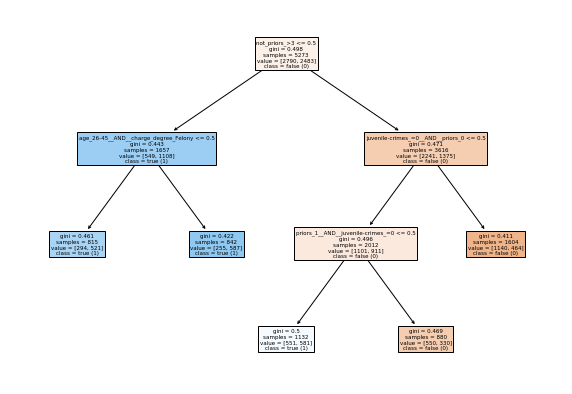

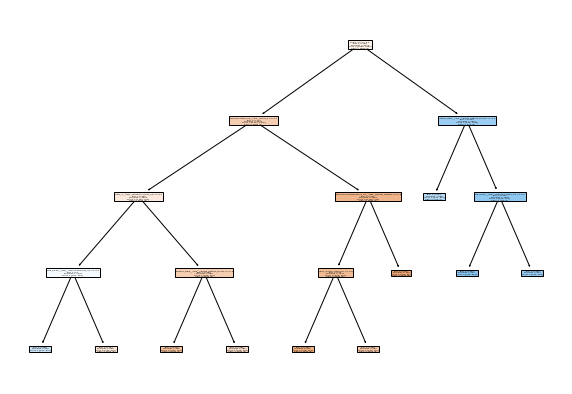

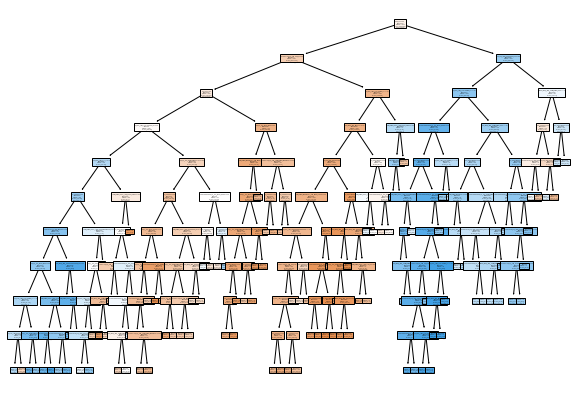

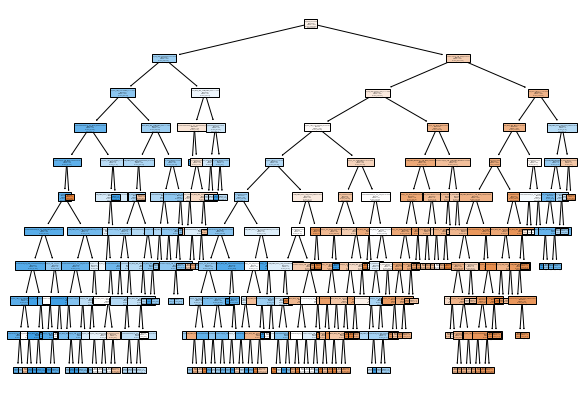

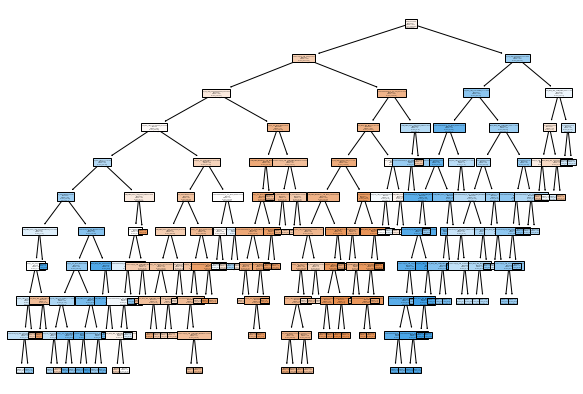

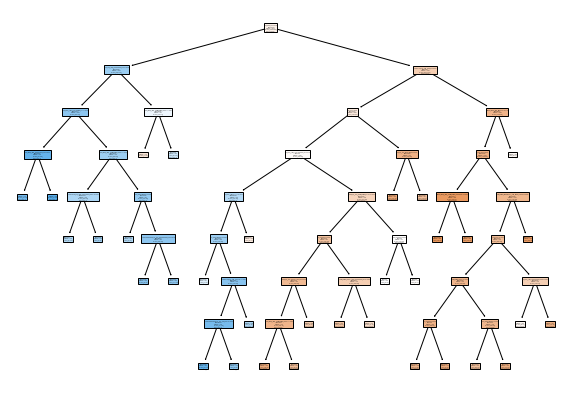

In [45]:
min_samples_list = [400, 60, 20, 100, 10, 1]

for i in range(6):
    
    if i < 3:
        split = "best"
    else:
        split = "random"
        
    samples = min_samples_list[i]
        
    clf = tree.DecisionTreeClassifier(max_depth=10, splitter=split, min_samples_leaf=samples)
    clf = clf.fit(train_examples, train_labels)

    text_representation = tree.export_text(clf)
             
    fig = plt.figure(figsize=(10,7))
    _ = tree.plot_tree(
        clf, 
        feature_names=(features),
        class_names=("false (0)", "true (1)" ), 
        filled=True
    )



Propose an evaluation in terms of training and testing accuracies using $5$-cross validation on two decision trees that have different typologies

In [87]:
from sklearn.model_selection import KFold

tests = [
    [1000, "best", 20],
    [1000, "random", 20]
]
NB_TESTS = 50

def evaluate(test_list, nb_tests):
    
    train_accuracies = []
    test_accuracies = []

    for j in range(len(test_list)):
        #On effectue un certain nombre de tests et on prend la moyenne des résultats
        somme_test = 0
        somme_train = 0

        for i in range(NB_TESTS):
            kf = KFold(n_splits=5)
            clf = tree.DecisionTreeClassifier(max_depth=test_list[j][0], splitter=test_list[j][1], min_samples_leaf=test_list[j][2])

            n = 0
            for train_index, test_index in kf.split(train_examples):
                X_train_k, X_test_k = train_examples[train_index], train_examples[test_index]
                y_train_k, y_test_k = train_labels[train_index], train_labels[test_index]
                clf = clf.fit(X_train_k, y_train_k)
                #print(clf.score(X_test_k, y_test_k))
                #print(clf.score(X_train_k, y_train_k))
                #print("-------------------------")
                somme_test += clf.score(X_test_k, y_test_k)
                somme_train += clf.score(X_train_k, y_train_k)
                n += 1
        train_accuracy = 100*somme_train/(n*NB_TESTS)
        test_accuracy = 100*somme_test/(n*NB_TESTS)
        print(f"Test n°{j+1}/{len(test_list)} : {train_accuracy} - {test_accuracy}")
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
        
    return train_accuracies, test_accuracies

evaluate(tests, NB_TESTS)

Test n°1/2 : 68.46198489503833 - 66.56868080973409
Test n°2/2 : 68.46198489503833 - 66.56678327652726


([68.46198489503833, 68.46198489503833],
 [66.56868080973409, 66.56678327652726])

Propose an experimental study that shows the transition phase from underfitting to overfitting 

Test n°1/50 : 69.69940786959026 - 64.71208755631902
Test n°2/50 : 69.43656031875499 - 64.78996771495633
Test n°3/50 : 69.31859953914817 - 65.11237965053024
Test n°4/50 : 69.18357076653518 - 65.18944216120939
Test n°5/50 : 69.06883680377003 - 65.63544088419661
Test n°6/50 : 69.01194117109581 - 65.68324828907267
Test n°7/50 : 68.95031294564725 - 65.7976970601725
Test n°8/50 : 68.87445659753882 - 65.926662769679
Test n°9/50 : 68.86023184647209 - 65.9429463025081
Test n°10/50 : 68.81756096486464 - 65.98542982274707
Test n°11/50 : 68.77963391467475 - 65.93610079408612
Test n°12/50 : 68.69429777078133 - 66.03551642580288
Test n°13/50 : 68.66585388796925 - 66.27769346295325
Test n°14/50 : 68.61369759125513 - 66.29437520796435
Test n°15/50 : 68.58998742508186 - 66.23598694209387
Test n°16/50 : 68.580504257704 - 66.10552442961595
Test n°17/50 : 68.53783674768962 - 66.19812620844098
Test n°18/50 : 68.49516586608212 - 66.28303821146262
Test n°19/50 : 68.48094336274379 - 66.43167891220092
Test n°2

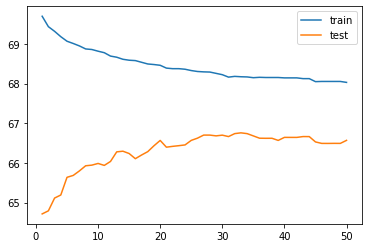

In [89]:
#On trace l'évolution des scores de tests et d'entraînement
#Phase overfitting: Training > Testing
#Phase underfitting: Training < Testing

tests2 = []

min_samples_list = np.linspace(1, 50, 20).astype(int)

for min_samples in min_samples_list:
    tests2.append([100, "best", min_samples])

train_results, test_results = evaluate(tests2, 5)
xaxis = min_samples_list
plt.plot(xaxis, train_results, label="train")
plt.plot(xaxis, test_results, label="test")
plt.legend()
plt.show()

Construct the confusion matrix on a particular good configuration (after explaining your choice)

Provide an evaluation of the fairness of the model based on the False Positive Rate